<a href="https://colab.research.google.com/github/David-Almaguer-La-Rosa/amazong-automatic-review-analyzer/blob/main/Amazong_automatic_review_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from string import punctuation, digits
import nltk
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for plotting
from sklearn import linear_model
from sklearn import model_selection as ms
from google.colab import drive
drive.mount('/content/drive')

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/Curso edX/Project 1: Automatic Review Analyzer/sentiment_analysis/reviews_train.tsv', sep='\t', encoding = 'latin_1')
test_data = pd.read_csv('/content/drive/MyDrive/Curso edX/Project 1: Automatic Review Analyzer/sentiment_analysis/reviews_test.tsv', sep='\t', encoding = 'latin_1')
X_train = train_data['text']
y_train = train_data['sentiment']
X_test = test_data['text']
y_test = test_data['sentiment']

In [3]:
# store words of each review in python list
def extract_words(text):    
    for c in punctuation + digits:
        text = text.replace(c, ' ' + c + ' ')
    return text.lower().split()

In [4]:
# building a bag of words 
def bag_of_words(texts, stopwords):    
    indices_by_word = {}  # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word in indices_by_word: continue
            if word in stopwords: continue
            indices_by_word[word] = len(indices_by_word)
    return indices_by_word

In [ ]:
nltk.download('stopwords') # download english stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords
indices_by_word = bag_of_words(X_train, stopwords)

In [6]:
def extract_bow_feature_vectors(reviews, indices_by_word):      
    feature_matrix = np.zeros([len(reviews), len(indices_by_word)], dtype=np.float64)
    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word not in indices_by_word: continue
            feature_matrix[i, indices_by_word[word]] = 1                                                                          
    return feature_matrix

In [7]:
training_feature_vectors = np.array(extract_bow_feature_vectors(X_train, indices_by_word))
test_feature_vectors = np.array(extract_bow_feature_vectors(X_test, indices_by_word))
trainig_labels = np.array(y_train)
test_labels = np.array(y_test)

In [8]:
# find the regularization parameter alpha that minimizes the loss
alpha = np.arange(1e-15,1,0.005) # range of hyperparameter values 1e-15 to 1 by 0.005 (this is the regularization parameter)
val_scores = np.zeros((len(alpha),1)) # initialize validation score for each alpha value

for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, training_feature_vectors, trainig_labels, cv=5)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores

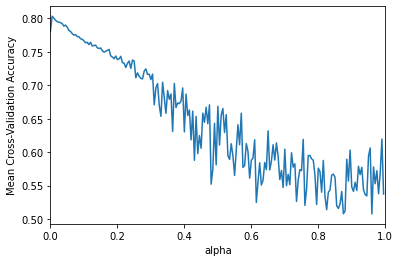

In [9]:
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

alpha_star = 0.005000000000001


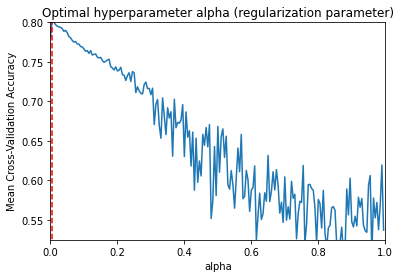

In [10]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores) #argmax: returns the indices of the maximum values along an axis.
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
plt.ylim(0.525,0.8)
plt.title('Optimal hyperparameter alpha (regularization parameter)')
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

In [11]:
# train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(training_feature_vectors, trainig_labels)
print('Training Accuracy =', model_trained.score(training_feature_vectors, trainig_labels))

Training Accuracy = 0.9415


In [12]:
# accuracy of the model for test data
print('Test Accuracy =', model_trained.score(test_feature_vectors, test_labels))

Test Accuracy = 0.818


In [41]:
# predictions using the first observations of X_test   
predictions = pd.DataFrame(model_trained.predict(test_feature_vectors[:11]))
prediction_text = pd.DataFrame(X_test[:11])
first_y_test = pd.DataFrame(y_test[:11])
table = pd.concat([prediction_text, first_y_test, predictions], axis=1, ignore_index=True)
table[2] = np.where(table[2] == 1, 'Positive', 'Negative')
table.rename(columns={0:'Amazong review', 1:'Real value', 2:'Prediction'})


,Amazong review,Real value,Prediction
0,My built-in Bosch coffee machine has trouble g...,1,Positive
1,"An absolute ""must have"" item for your Bloody M...",1,Positive
2,I have a Great Dane & most treats are gone in ...,1,Positive
3,I got turned on to dried mangoes from the ones...,-1,Negative
4,"I enjoyed the product, good taste, good qualit...",1,Negative
5,After doing numerous googles looking for Chips...,-1,Negative
6,"The texture of this chip is firm, solid, subst...",1,Negative
7,I'm drinking oolong tea because Dr Oz said it ...,-1,Negative
8,"This dip mix is too salty, and it tastes more ...",-1,Negative
9,I love this amazing product. I eat it daily i...,1,Positive
